In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt


In [3]:
import pandas as pd  
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LogisticRegression  
from sklearn.preprocessing import StandardScaler  
from sklearn.feature_selection import SelectKBest, f_classif  
from sklearn import metrics 

In [4]:
df = pd.read_csv('spambase.data')
num_columns = df.shape[1]
# 生成新的列标题
new_columns = [f'特征{i+1}' for i in range(num_columns-1)]
new_columns.append("分类结果")
# 将新列名赋值给 DataFrame
df.columns = new_columns

In [5]:
df
#数据展示

,特征1,特征2,特征3,特征4,特征5,特征6,特征7,特征8,特征9,特征10,...,特征49,特征50,特征51,特征52,特征53,特征54,特征55,特征56,特征57,分类结果
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.000,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4596,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4597,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4598,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [7]:
#定义邮件类，便于新数据加入列表数据中

class Email:  
    def __init__(self, content):  
        self.content = content  
  
    def uppercase_ratio(self):  #获取邮件的特征53
        try:  
            total_characters = len(self.content)  
            uppercase_count = sum(1 for char in self.content if char.isupper())  
            ratio = uppercase_count / total_characters  
            return ratio  
        except ZeroDivisionError:  
            print("空邮件")  #采用解决异常的方法，如果除数为0，就报输入为空邮件
            
    def letter_a_ratio(self):  #获取邮件的特征1
        try:  
            total_characters = len(self.content)  
            a_count = sum(1 for char in self.content if char.lower() == 'a')  
            ratio = a_count / total_characters  
            return ratio  
        except ZeroDivisionError:  
            print("空邮件") 
#以此类推定义其他获取邮件特征的函数

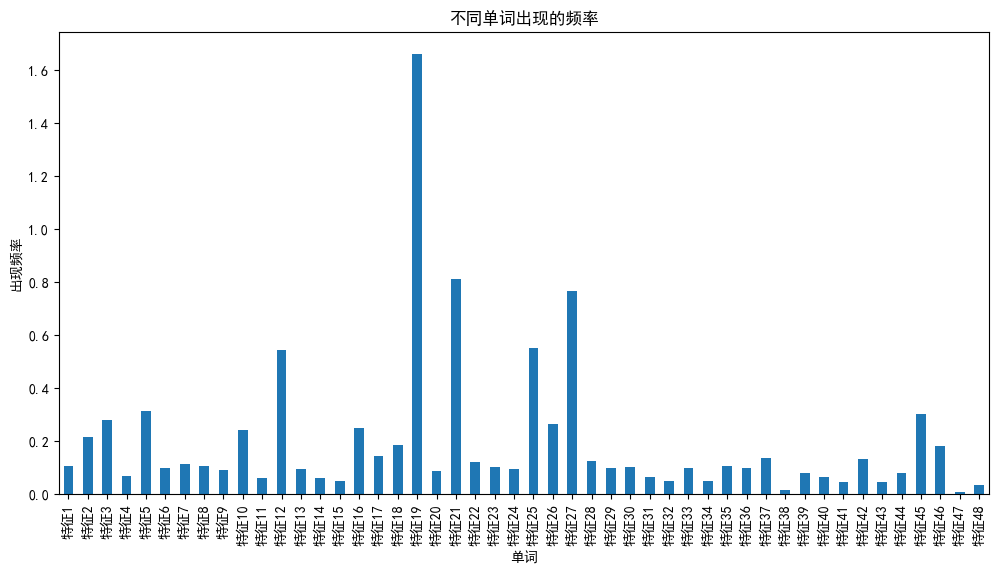

In [13]:
#绘制单词出现频率直方图
from plotnine import ggplot, aes, geom_bar, theme, element_text 
# 选择前48列进行处理  
df_subset = df.iloc[:, :48]  
  
# 计算每一类的均值  
mean_values = df_subset.mean()  
plt.rcParams['font.sans-serif']=['SimHei']
# 绘制柱状图  
plt.figure(figsize=(12, 6))  
mean_values.plot(kind='bar')  
plt.xlabel('单词')  
plt.ylabel('出现频率')  
plt.title('不同单词出现的频率')  
plt.show()  

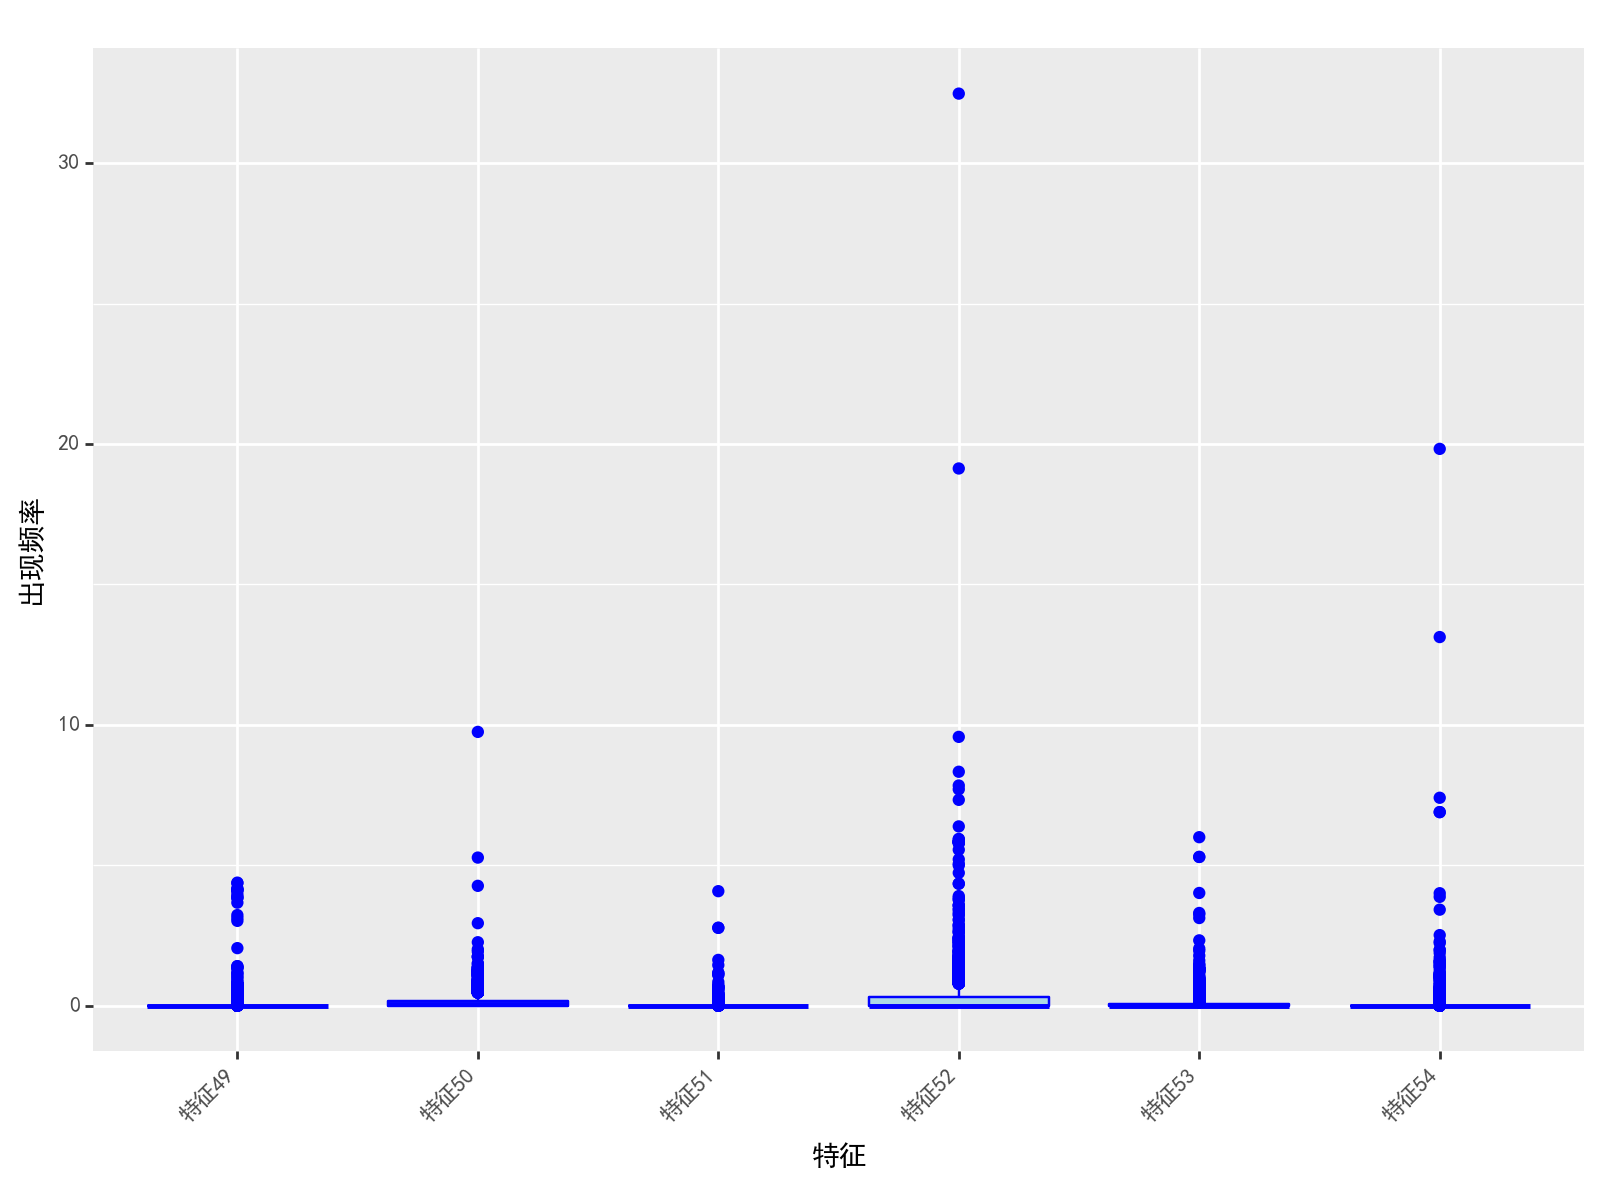

<Figure Size: (800 x 600)>

In [23]:
#获取字符出现频率箱线图
from plotnine import ggplot, aes, geom_boxplot, theme, element_text  
import pandas as pd  
  

# 选择第49到54列进行处理  
df_subset = df.iloc[:, 48:54]  
  
# 将数据转换为适合绘图的长格式  
df_subset_long = df_subset.melt(var_name='特征', value_name='出现频率')  
  
# 绘制箱线图  
(  
    ggplot(df_subset_long, aes(x='特征', y='出现频率')) +  
    geom_boxplot(fill='lightblue', color='blue') +  
    theme(axis_text_x=element_text(rotation=45, hjust=1)) +  
    theme(figure_size=(8, 6)) +  
    theme(axis_text=element_text(size=8)) +  
    theme(axis_title=element_text(size=10)) +  
    theme(legend_position='none')  + theme(text=element_text(family="SimHei"))
)  

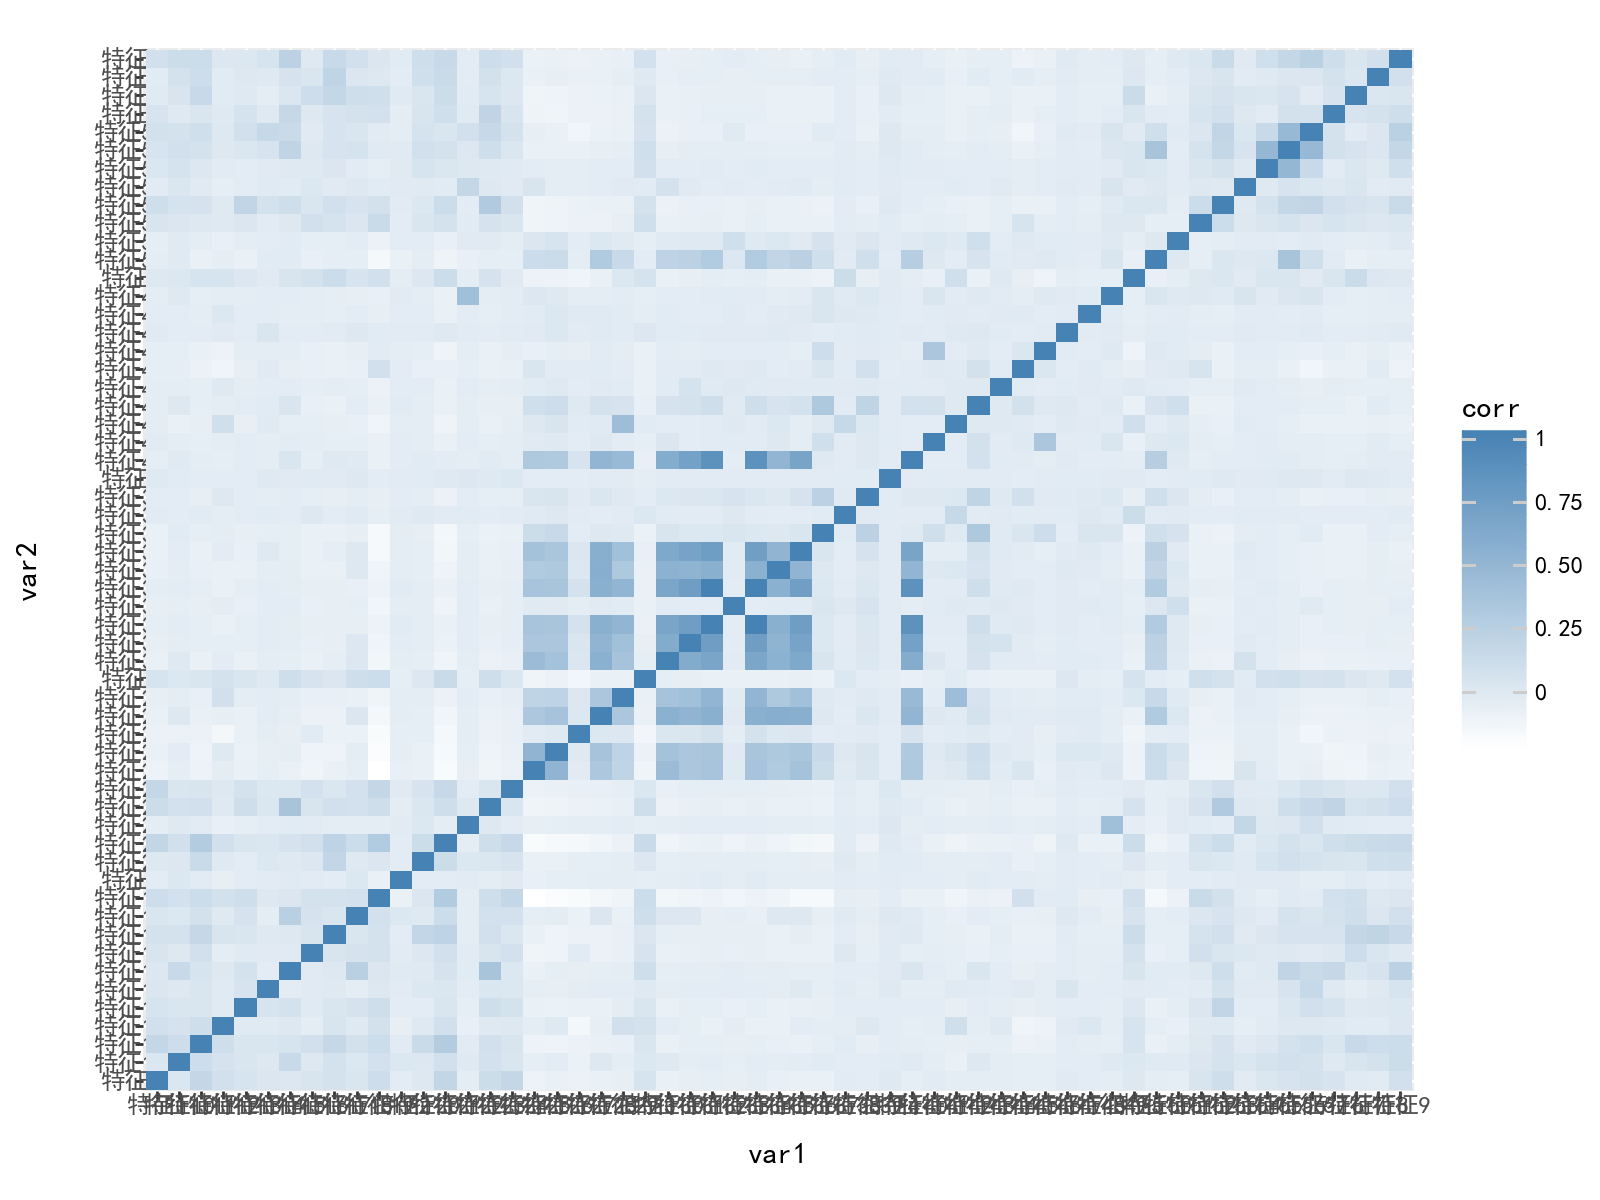

<Figure Size: (800 x 600)>

In [26]:
from plotnine import ggplot, aes, geom_tile, scale_fill_gradient, theme, element_blank, element_text  
import pandas as pd  
import numpy as np  
  

# 选择前57列进行处理  
df_subset = df.iloc[:, :57]  
  
# 计算相关系数矩阵  
correlation_matrix = df_subset.corr()  
  
# 将相关系数矩阵转换为适合绘图的长格式  
correlation_df = correlation_matrix.stack().reset_index()  
correlation_df.columns = ['var1', 'var2', 'corr']  
  
# 绘制相关系数图  
(  
    ggplot(correlation_df, aes(x='var1', y='var2', fill='corr')) +  
    geom_tile() +  
    scale_fill_gradient(low="white", high="steelblue") +  
    theme(axis_text_x=element_blank(), axis_text_y=element_blank()) +  
    theme(legend_position='right') +  
    theme(figure_size=(8, 6))  + theme(text=element_text(family="SimHei"))
)  

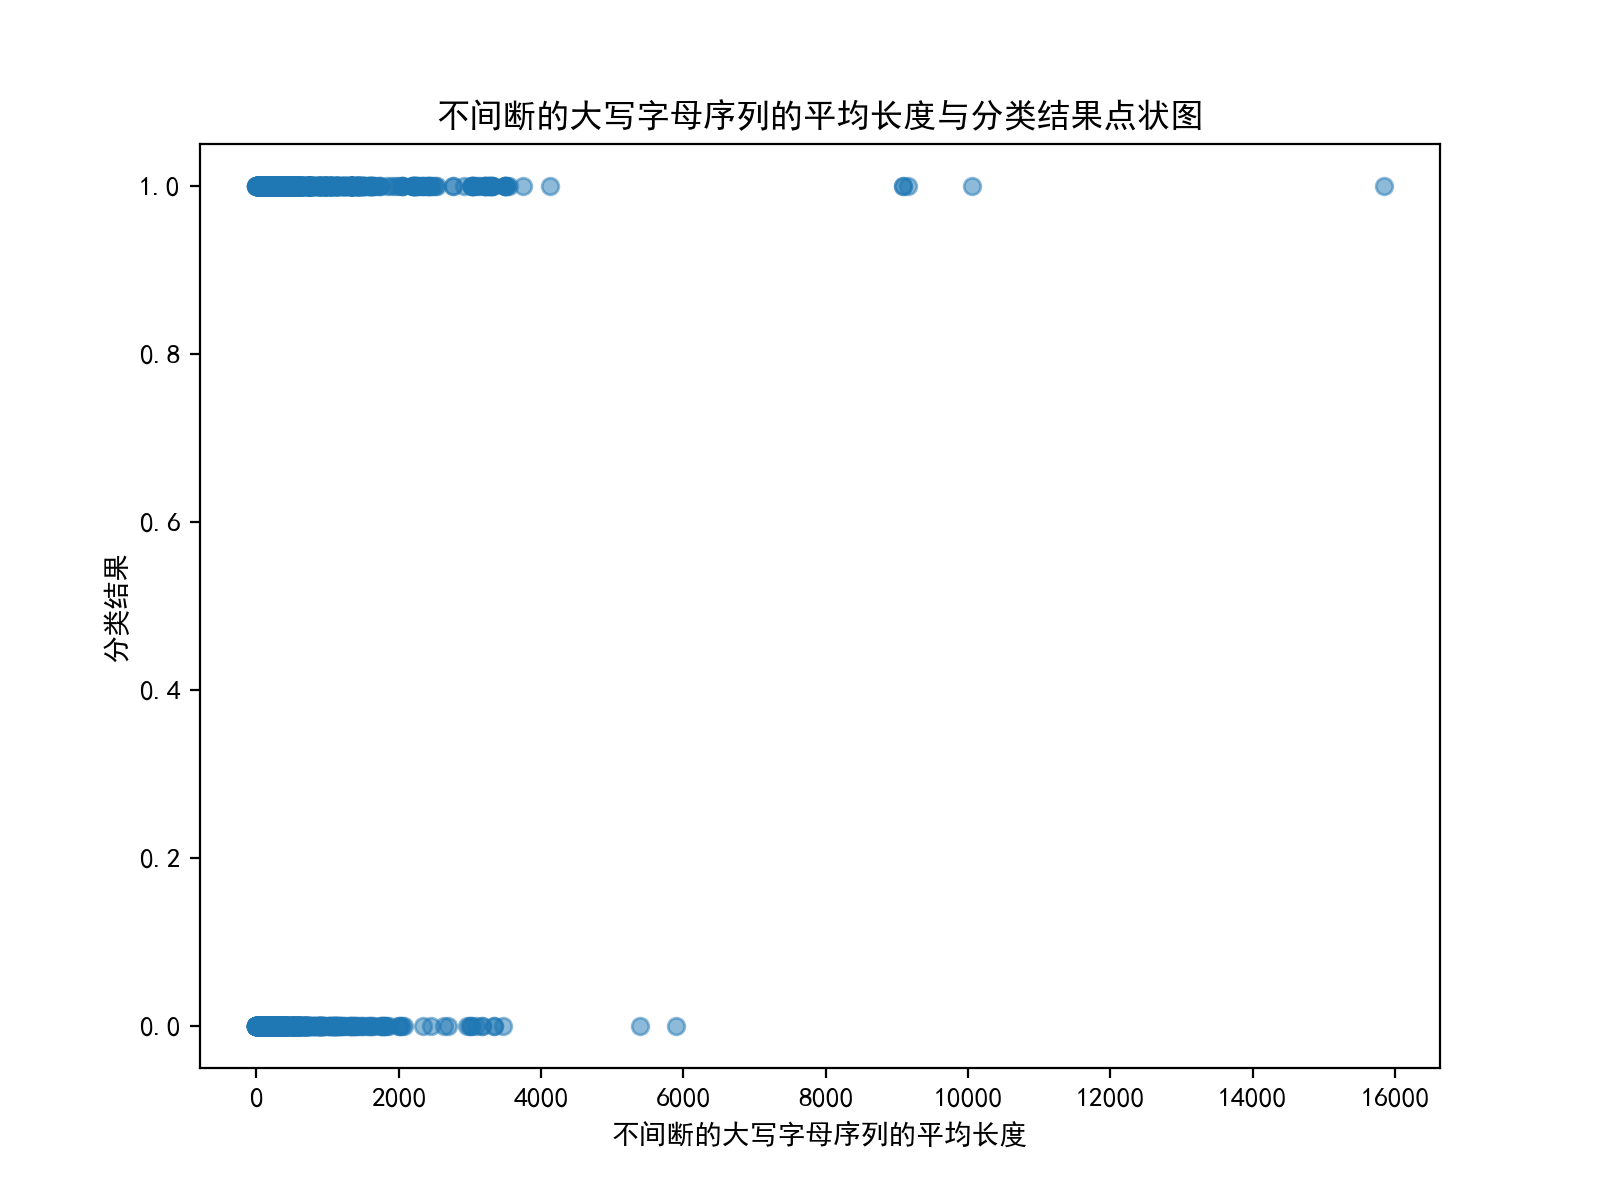

In [31]:
import matplotlib.pyplot as plt  
import pandas as pd  
  
# 选择第57列作为x，第58列作为y  
x_data = df.iloc[:, 56]  
y_data = df.iloc[:, 57]  
plt.rcParams['font.sans-serif']=['SimHei'] 
# 绘制散点图  
plt.figure(figsize=(8, 6))  
plt.scatter(x_data, y_data, alpha=0.5)  
plt.title('不间断的大写字母序列的平均长度与分类结果点状图')  
plt.xlabel('不间断的大写字母序列的平均长度')  
plt.ylabel('分类结果')  
plt.show() 

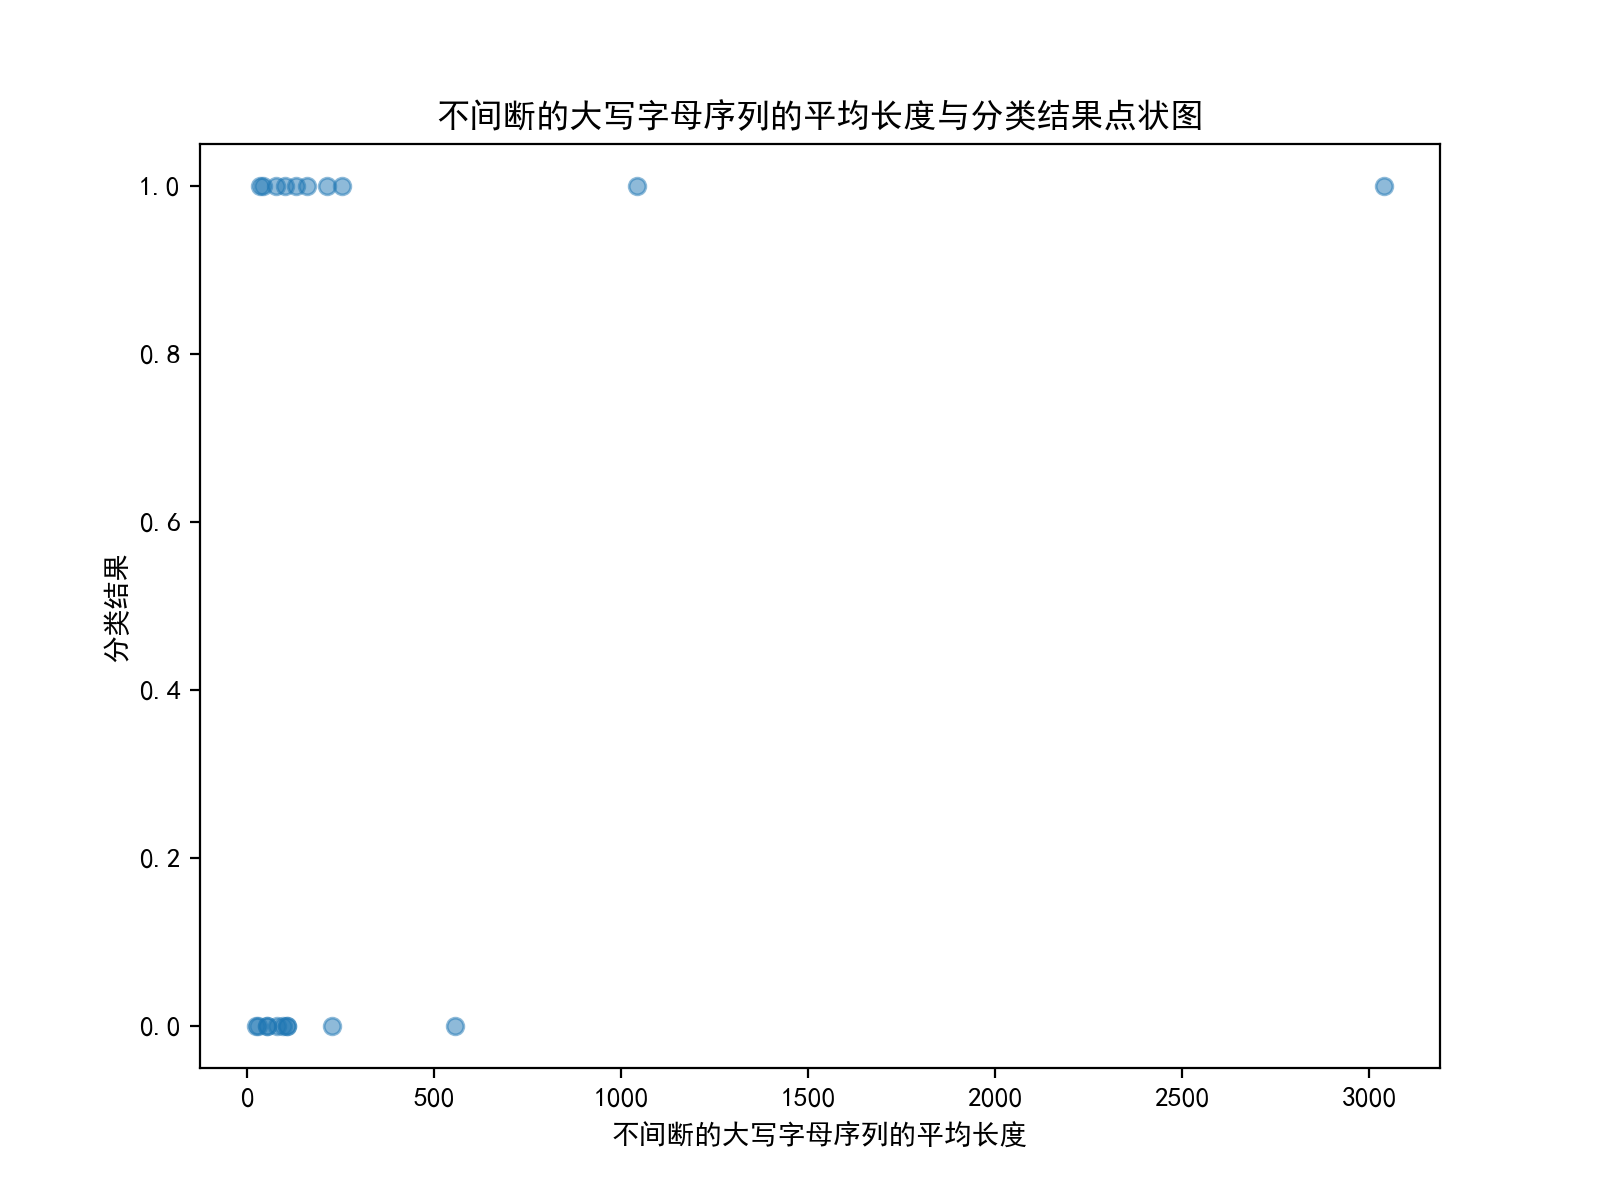

In [35]:
import matplotlib.pyplot as plt  
import pandas as pd  
import numpy as np  
  

# 选择随机抽取的50行数据  
random_subset = df.sample(n=20, random_state=1)  
  
# 选择第57列作为x，第58列作为y  
x_data = random_subset.iloc[:, 56]  
y_data = random_subset.iloc[:, 57]  
  
# 绘制散点图  
plt.figure(figsize=(8, 6))  
plt.scatter(x_data, y_data, alpha=0.5)  
plt.title('不间断的大写字母序列的平均长度与分类结果点状图')  
plt.xlabel('不间断的大写字母序列的平均长度')  
plt.ylabel('分类结果') 
plt.show()  

In [8]:
data = df
X = data.iloc[:, 0:57]  # 选择前57列作为特征  
y = data.iloc[:, 57]    # 选择最后一列作为分类结果

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  
#划分训练集与测试集

In [10]:
selector = SelectKBest(score_func=f_classif, k=30)  # 选择前30个最佳特征  
X_train_selected = selector.fit_transform(X_train, y_train)  
X_test_selected = selector.transform(X_test)  

In [11]:
scaler = StandardScaler()  
X_train_scaled = scaler.fit_transform(X_train_selected)  
X_test_scaled = scaler.transform(X_test_selected)  

In [ ]:
#两种不同正则项下得到的参数
model1 = LogisticRegression(penalty="l1", C=0.5, solver="liblinear")
model2 = LogisticRegression(penalty="l2", C=0.5, solver="liblinear")
model1.fit(X_train_scaled, y_train) 
model2.fit(X_train_scaled, y_train)

coefficients = model2.coef_  
print("Coefficients2:", coefficients)
predictions = model2.predict(X_test_scaled)  

accuracy = metrics.accuracy_score(y_test, predictions)  
precision = metrics.precision_score(y_test, predictions)  
recall = metrics.recall_score(y_test, predictions) 


Text(0.5, 1.0, '准确率与正则项系数的关系')

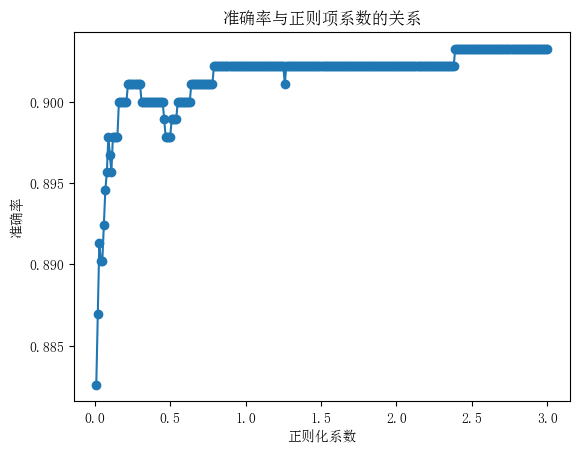

In [14]:
#画出准确率与正则化系数的关系便于调参
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.linear_model import LogisticRegression  
from sklearn.model_selection import cross_val_score  
  
# 假设 Cs 是你想要尝试的正则化系数的取值  
Cs = [0.01*i+0.01 for i in range(300)]  # 一系列正则化系数的取值  
  
# 用于存储不同正则化系数下的准确率  
accuracies = []  
  
# 对每个正则化系数进行交叉验证并计算准确率  
for C in Cs:  
    model = LogisticRegression(penalty="l2",C=C)  
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    accuracy = metrics.accuracy_score(y_test, predictions) 
    accuracies.append(accuracy) 
    plt.rcParams['font.sans-serif']=['Simsun'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号 
# 画出准确率关于正则化系数的图  
plt.figure()  
plt.plot(Cs, accuracies, marker='o')  
  # 如果 Cs 是按对数尺度取值的话，可以将 x 轴设置为对数尺度  
plt.xlabel('正则化系数')  
plt.ylabel('准确率')  
plt.title('准确率与正则项系数的关系')  




In [6]:
#使用随机森林模型进行拟合

# 1. 导入必要的库和模块  
import numpy as np  
import pandas as pd  
from sklearn.model_selection import train_test_split  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import accuracy_score, classification_report  
  

# 4. 划分数据集  
X = df.iloc[:, :57]  # 特征  
y = df.iloc[:, 57]   # 分类结果  
  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  
  
# 5. 创建随机森林模型  
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  
  
# 6. 拟合模型  
rf_model.fit(X_train, y_train)  
  
# 7. 评估模型  
y_pred = rf_model.predict(X_test)  
accuracy = accuracy_score(y_test, y_pred)  
report = classification_report(y_test, y_pred)  
  
print("准确率:", accuracy)  
print("分类报告:")  
print(report)

准确率: 0.9304347826086956
分类报告:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       530
           1       0.95      0.88      0.91       390

    accuracy                           0.93       920
   macro avg       0.93      0.92      0.93       920
weighted avg       0.93      0.93      0.93       920



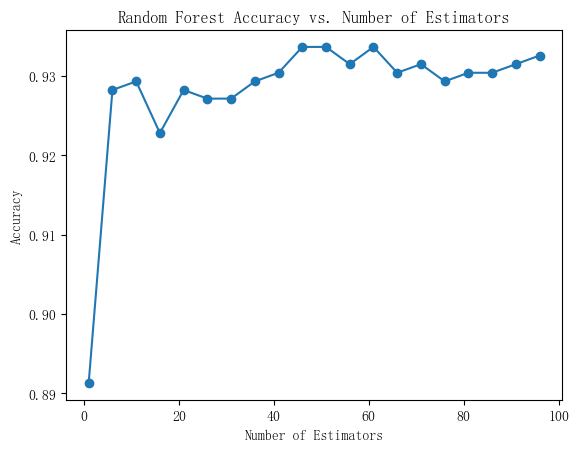

In [15]:
# 定义决策树数量的范围  
n_estimators_range = range(1, 101, 5)  # 从1到100，步长为5  
  
# 初始化准确率列表  
accuracies = []  
  
# 对每个决策树数量进行训练和评估  
for n in n_estimators_range:  
    rf_model = RandomForestClassifier(n_estimators=n, random_state=42)  
    rf_model.fit(X_train, y_train)  
    y_pred = rf_model.predict(X_test)  
    accuracy = accuracy_score(y_test, y_pred)  
    accuracies.append(accuracy)  
  
a# 绘制图表  
plt.plot(n_estimators_range, accuracies, marker='o')  
plt.title('决策树个数对准确率的影响')  
plt.xlabel('Number of Estimators')  
plt.ylabel('Accuracy')  
plt.show()  

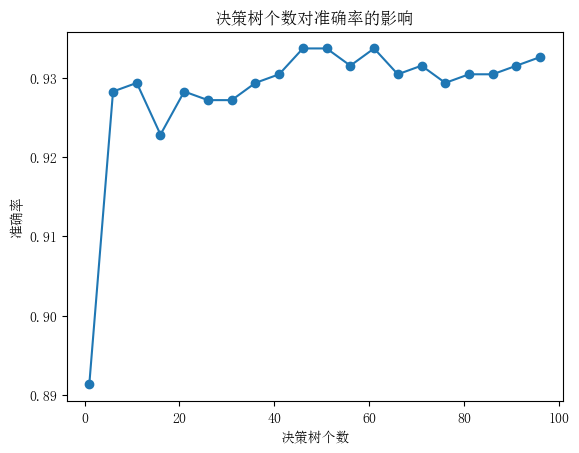

In [16]:
plt.plot(n_estimators_range, accuracies, marker='o')  
plt.title('决策树个数对准确率的影响')  
plt.xlabel('决策树个数')  
plt.ylabel('准确率')  
plt.show() 